# 1.5 Text Mining

### Importing libraries and data

In [2]:
#importing libraries
from textblob import TextBlob 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import nltk
import re
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from collections import Counter
sns.set()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\canam\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\canam\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\canam\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [3]:
myfile = open('Key_events_of_the_20th_century_article_Wiki.txt', encoding='utf-8')

In [6]:
#importing text file 
with open('Key_events_of_the_20th_century_article_Wiki.txt', 'r', errors='ignore') as file:
    data = file.read().replace('\n', '')

### Tokenization

In [14]:
# tokenizing words
from nltk.tokenize import word_tokenize
tokenized_word = word_tokenize(data)
print(tokenized_word)

['Key', 'events', 'of', 'the', '20th', 'century', '-', 'WikipediaJump', 'to', 'contentMain', 'menuMain', 'menumove', 'to', 'sidebarhide', 'Navigation', 'Main', 'pageContentsCurrent', 'eventsRandom', 'articleAbout', 'WikipediaContact', 'us', 'Contribute', 'HelpLearn', 'to', 'editCommunity', 'portalRecent', 'changesUpload', 'fileSearchSearchAppearanceDonateCreate', 'accountLog', 'inPersonal', 'toolsDonate', 'Create', 'account', 'Log', 'in', 'Pages', 'for', 'logged', 'out', 'editors', 'learn', 'moreContributionsTalkContentsmove', 'to', 'sidebarhide', '(', 'Top', ')', '1Historic', 'events', 'in', 'the', '20th', 'centuryToggle', 'Historic', 'events', 'in', 'the', '20th', 'century', 'subsection1.1World', 'at', 'the', 'beginning', 'of', 'the', 'century1.1.1', "''", 'The', 'war', 'to', 'end', 'all', 'wars', "''", ':', 'World', 'War', 'I', '(', '1914â€', '“', '1918', ')', '1.1.2Russian', 'Revolution', 'and', 'communism1.2Between', 'the', 'wars1.2.1Economic', 'depression1.2.2The', 'rise', 'of', 

In [16]:
# creating frequency distribution
from nltk.probability import FreqDist
dist_words = FreqDist(tokenized_word)
print(dist_words)

<FreqDist with 4815 samples and 20993 outcomes>


### Top 10 Most Common Words

In [18]:
#finding the 10 most common words
dist_words.most_common(10)

[('.', 1275),
 ('the', 1099),
 (',', 963),
 ('of', 604),
 ('and', 398),
 ('to', 326),
 ('[', 302),
 (']', 302),
 ('The', 300),
 ('in', 291)]

In [20]:
#turning list into a dataframe 
top_10_most_common_words = pd.DataFrame(dist_words.most_common(10))

In [22]:
top_10_most_common_words

,0,1
0,.,1275
1,the,1099
2,",",963
3,of,604
4,and,398
5,to,326
6,[,302
7,],302
8,The,300
9,in,291


In [24]:
#changing the column titles
top_10_most_common_words.columns = ['Word', "Occurences"]

In [26]:
#checking the column titles were changed
top_10_most_common_words

,Word,Occurences
0,.,1275
1,the,1099
2,",",963
3,of,604
4,and,398
5,to,326
6,[,302
7,],302
8,The,300
9,in,291


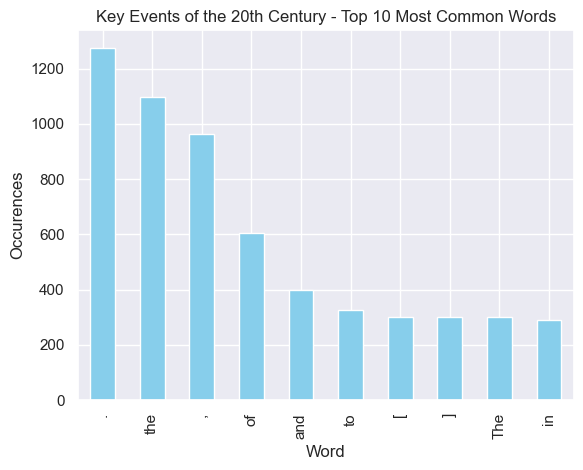

In [34]:
#plotting results 
top_10_most_common_words.plot(kind='bar', x='Word', y='Occurences', color='skyblue')
plt.xlabel('Word')
plt.ylabel('Occurences')
plt.title('Key Events of the 20th Century - Top 10 Most Common Words')
plt.legend().set_visible(False)

### Top 10 Common Words after Filtering

In [36]:
# Defining stopwords
from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))
print(stop_words)

{'most', 'once', 'ain', 'was', 'the', "you're", 'any', 'each', 'there', 'won', 'into', "you'll", 'against', 'what', 'from', 'm', 'doesn', 'below', 'a', 'those', 'few', 'own', 'their', 'theirs', 'this', 'mightn', "couldn't", 'now', 'yourselves', "aren't", 'over', 'his', 'hasn', 'during', 'just', 'then', 'same', "shouldn't", 'd', 'itself', 'after', 'while', 'does', 'than', 'will', 'out', 'is', "don't", 'hadn', "haven't", 'he', 'between', "won't", 'up', 'ours', 'why', 'do', 'all', "you'd", 'very', 'because', 'y', 'you', 'at', 'they', 'i', 'themselves', 'if', "weren't", "should've", 'but', 'shan', 'your', 'before', 'can', 'haven', 'these', 'its', 'whom', 'or', 'through', 'for', "didn't", 'ma', "mustn't", 've', 'had', 'ourselves', "shan't", 'wouldn', 'when', 'him', "hadn't", 'we', 'couldn', 'have', 'again', 'am', "it's", 'other', 'who', 'myself', 'some', 'not', 'weren', 'me', 'with', "wouldn't", 'where', 'll', "mightn't", 'herself', "hasn't", 'how', 'are', 'should', 'yourself', 'them', 'mus

In [38]:
# Removing stopwords in words
filtered_words = [] # creates an empty list
for word in tokenized_word:
    if word not in stop_words:
        filtered_words.append(word)

In [40]:
filtered_words

['Key',
 'events',
 '20th',
 'century',
 '-',
 'WikipediaJump',
 'contentMain',
 'menuMain',
 'menumove',
 'sidebarhide',
 'Navigation',
 'Main',
 'pageContentsCurrent',
 'eventsRandom',
 'articleAbout',
 'WikipediaContact',
 'us',
 'Contribute',
 'HelpLearn',
 'editCommunity',
 'portalRecent',
 'changesUpload',
 'fileSearchSearchAppearanceDonateCreate',
 'accountLog',
 'inPersonal',
 'toolsDonate',
 'Create',
 'account',
 'Log',
 'Pages',
 'logged',
 'editors',
 'learn',
 'moreContributionsTalkContentsmove',
 'sidebarhide',
 '(',
 'Top',
 ')',
 '1Historic',
 'events',
 '20th',
 'centuryToggle',
 'Historic',
 'events',
 '20th',
 'century',
 'subsection1.1World',
 'beginning',
 'century1.1.1',
 "''",
 'The',
 'war',
 'end',
 'wars',
 "''",
 ':',
 'World',
 'War',
 'I',
 '(',
 '1914â€',
 '“',
 '1918',
 ')',
 '1.1.2Russian',
 'Revolution',
 'communism1.2Between',
 'wars1.2.1Economic',
 'depression1.2.2The',
 'rise',
 'dictatorship1.3Global',
 'war',
 ':',
 'World',
 'War',
 'II',
 '(',
 '

In [42]:
#removing punctuation 

filtered_words_sans_punc = re.sub("[^a-zA-Z]", 
                          " ",          
                          str(filtered_words))

In [44]:
filtered_words_sans_punc

'  Key    events      th    century         WikipediaJump    contentMain    menuMain    menumove    sidebarhide    Navigation    Main    pageContentsCurrent    eventsRandom    articleAbout    WikipediaContact    us    Contribute    HelpLearn    editCommunity    portalRecent    changesUpload    fileSearchSearchAppearanceDonateCreate    accountLog    inPersonal    toolsDonate    Create    account    Log    Pages    logged    editors    learn    moreContributionsTalkContentsmove    sidebarhide         Top          Historic    events      th    centuryToggle    Historic    events      th    century    subsection   World    beginning    century               The    war    end    wars               World    War    I                                          Russian    Revolution    communism   Between    wars     Economic    depression     The    rise    dictatorship   Global    war         World    War    II                                          The    war    Europe     Blitzkrieg     Ope

In [48]:
# word tokenization
tokenized_word_2 = word_tokenize(filtered_words_sans_punc)
print(tokenized_word_2)

['Key', 'events', 'th', 'century', 'WikipediaJump', 'contentMain', 'menuMain', 'menumove', 'sidebarhide', 'Navigation', 'Main', 'pageContentsCurrent', 'eventsRandom', 'articleAbout', 'WikipediaContact', 'us', 'Contribute', 'HelpLearn', 'editCommunity', 'portalRecent', 'changesUpload', 'fileSearchSearchAppearanceDonateCreate', 'accountLog', 'inPersonal', 'toolsDonate', 'Create', 'account', 'Log', 'Pages', 'logged', 'editors', 'learn', 'moreContributionsTalkContentsmove', 'sidebarhide', 'Top', 'Historic', 'events', 'th', 'centuryToggle', 'Historic', 'events', 'th', 'century', 'subsection', 'World', 'beginning', 'century', 'The', 'war', 'end', 'wars', 'World', 'War', 'I', 'Russian', 'Revolution', 'communism', 'Between', 'wars', 'Economic', 'depression', 'The', 'rise', 'dictatorship', 'Global', 'war', 'World', 'War', 'II', 'The', 'war', 'Europe', 'Blitzkrieg', 'Operation', 'Barbarossa', 'Turning', 'tides', 'Operation', 'Overlord', 'Final', 'days', 'The', 'war', 'Pacific', 'Background', 'Ja

In [50]:
# creating new frequency distribution
from nltk.probability import FreqDist
dist_words_2 = FreqDist(tokenized_word_2)
print(dist_words_2)

<FreqDist with 4083 samples and 11013 outcomes>


In [52]:
#finding the new 10 most common words
dist_words_2.most_common(10)

[('The', 320),
 ('December', 222),
 ('Retrieved', 205),
 ('War', 129),
 ('s', 98),
 ('war', 91),
 ('th', 86),
 ('World', 78),
 ('Soviet', 61),
 ('Hitler', 50)]

In [54]:
new_top_10_most_common_words = pd.DataFrame(dist_words_2.most_common(10))

In [56]:
new_top_10_most_common_words

,0,1
0,The,320
1,December,222
2,Retrieved,205
3,War,129
4,s,98
5,war,91
6,th,86
7,World,78
8,Soviet,61
9,Hitler,50


In [58]:
#changing the column titles
new_top_10_most_common_words.columns = ['Word', "Occurences"]

In [60]:
#checking to see if column titles were changed 
new_top_10_most_common_words

,Word,Occurences
0,The,320
1,December,222
2,Retrieved,205
3,War,129
4,s,98
5,war,91
6,th,86
7,World,78
8,Soviet,61
9,Hitler,50


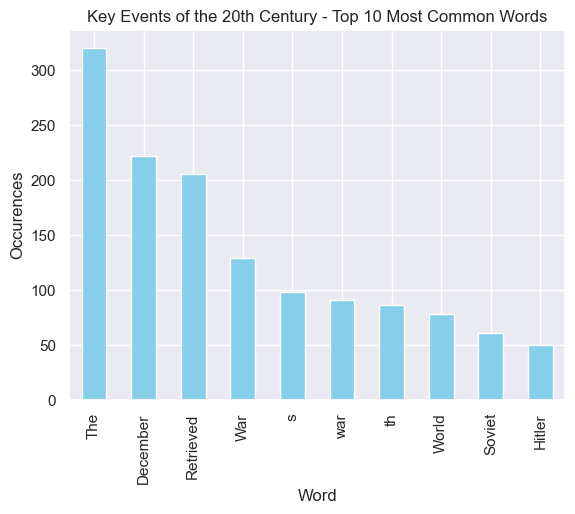

In [62]:
#plotting results 
new_top_10_most_common_words.plot(kind='bar', x='Word', y='Occurences', color='skyblue')
plt.xlabel('Word')
plt.ylabel('Occurences')
plt.title('Key Events of the 20th Century - Top 10 Most Common Words')
plt.legend().set_visible(False)

What has changed from the previous plot?  Now, we have words that actually identify the 20th century: war, world, Soviet, and Hitler. 

### Creating POS Tags

In [64]:
#filtering more words and letters
new_stopwords = ["And", "Then", 'n', 't', 's', 'The']

filtered = []
for word in tokenized_word_2:
     if word not in new_stopwords:
        filtered.append(word)

In [66]:
%%time
text = TextBlob(str(filtered)) #creating a TextBlob object

CPU times: total: 31.2 ms
Wall time: 28.9 ms


In [68]:
text

TextBlob("['Key', 'events', 'th', 'century', 'WikipediaJump', 'contentMain', 'menuMain', 'menumove', 'sidebarhide', 'Navigation', 'Main', 'pageContentsCurrent', 'eventsRandom', 'articleAbout', 'WikipediaContact', 'us', 'Contribute', 'HelpLearn', 'editCommunity', 'portalRecent', 'changesUpload', 'fileSearchSearchAppearanceDonateCreate', 'accountLog', 'inPersonal', 'toolsDonate', 'Create', 'account', 'Log', 'Pages', 'logged', 'editors', 'learn', 'moreContributionsTalkContentsmove', 'sidebarhide', 'Top', 'Historic', 'events', 'th', 'centuryToggle', 'Historic', 'events', 'th', 'century', 'subsection', 'World', 'beginning', 'century', 'war', 'end', 'wars', 'World', 'War', 'I', 'Russian', 'Revolution', 'communism', 'Between', 'wars', 'Economic', 'depression', 'rise', 'dictatorship', 'Global', 'war', 'World', 'War', 'II', 'war', 'Europe', 'Blitzkrieg', 'Operation', 'Barbarossa', 'Turning', 'tides', 'Operation', 'Overlord', 'Final', 'days', 'war', 'Pacific', 'Background', 'Japanese', 'Expansio

In [70]:
#creating a tags_list object
tags_list = text.tags

In [71]:
tags_list

[('[', 'JJ'),
 ("'Key", 'NNP'),
 ("'", 'POS'),
 ("'events", 'NNS'),
 ("'", 'POS'),
 ("'th", 'NNP'),
 ("'", 'POS'),
 ("'century", 'NNP'),
 ("'", 'POS'),
 ("'WikipediaJump", 'NNP'),
 ("'", 'POS'),
 ("'menumove", 'NNP'),
 ("'", 'POS'),
 ("'sidebarhide", 'NNP'),
 ("'", 'POS'),
 ("'Navigation", 'NN'),
 ("'pageContentsCurrent", 'NNP'),
 ("'", 'POS'),
 ("'eventsRandom", 'NNP'),
 ("'", 'POS'),
 ("'articleAbout", 'IN'),
 ("'WikipediaContact", 'NNP'),
 ("'", 'POS'),
 ("'us", 'NNP'),
 ("'", 'POS'),
 ("'HelpLearn", 'NNP'),
 ("'", 'POS'),
 ("'editCommunity", 'NNP'),
 ("'", 'POS'),
 ("'portalRecent", 'NNP'),
 ("'", 'POS'),
 ("'fileSearchSearchAppearanceDonateCreate", 'NNP'),
 ("'", 'POS'),
 ("'accountLog", 'NNP'),
 ("'", 'POS'),
 ("'inPersonal", 'NNP'),
 ("'", 'POS'),
 ("'toolsDonate", 'NNP'),
 ("'", 'POS'),
 ("'Create", 'NNP'),
 ("'", 'POS'),
 ("'account", 'NNP'),
 ("'", 'POS'),
 ("'Log", 'NNP'),
 ("'", 'POS'),
 ("'Pages", 'NNS'),
 ("'", 'POS'),
 ("'logged", 'VBD'),
 ("'editors", 'NNS'),
 ("'", 'PO

In [74]:
df_tags = pd.DataFrame(tags_list) #creating dataframe
df_tags.columns = ['Words', "Word type"] #renaming columns 

In [76]:
df_tags.head()

,Words,Word type
0,[,JJ
1,'Key,NNP
2,',POS
3,'events,NNS
4,',POS


### Top 10 Word Types

In [78]:
#grouping words by word type 
df_tags_count = df_tags.groupby('Word type').count().reset_index() 

In [99]:
df_tags_count.head()

,Word type,Words
0,CC,1
1,CD,75
2,DT,13
3,EX,12
4,FW,43


In [129]:
#determining the top 10 words types
top_10_word_types = df_tags_count.nlargest(10, 'Words')

In [131]:
top_10_word_types

,Word type,Words
13,POS,6922
11,NNP,5638
12,NNS,1030
16,VBD,849
10,NN,376
17,VBG,321
6,JJ,284
5,IN,155
15,RB,140
20,VBZ,79


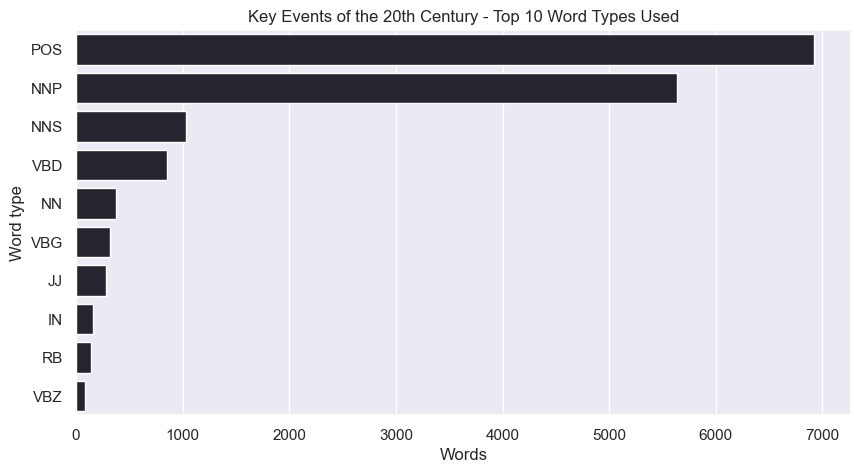

In [137]:
#plotting top 10 word types
plt.figure(figsize = (10, 5))
with sns.dark_palette("xkcd:blue", 20):
    sns.barplot(x = "Words", y = "Word type",
    saturation = 0.9, data = top_10_word_types).set_title("Key Events of the 20th Century - Top 10 Word Types Used")

### Top 10 Nouns 

In [96]:
#determining the top 10 nouns used
#creating a dataframe with only nouns
nouns_used = df_tags[(df_tags['Word type'] == "NN") | (df_tags['Word type'] == "NNS") | (df_tags['Word type'] == "NNP")]
nouns_used.columns = ["Word", "Occurences"] #renaming column names 
x = nouns_used.groupby('Word').count().reset_index() #grouping words by occurences
y = x.sort_values(by = ['Occurences'], ascending=False) #sorting values 
top_10_nouns = y.nlargest(10, 'Occurences') #identifying the top 10 nouns 

In [86]:
top_10_nouns

,Word,Occurences
287,'December,222
1247,'War,129
2586,'war,91
2506,'th,86
1297,'World,78
1100,'Soviet,61
532,'Hitler,50
531,'History,41
557,'ISBN,39
2619,'www,39


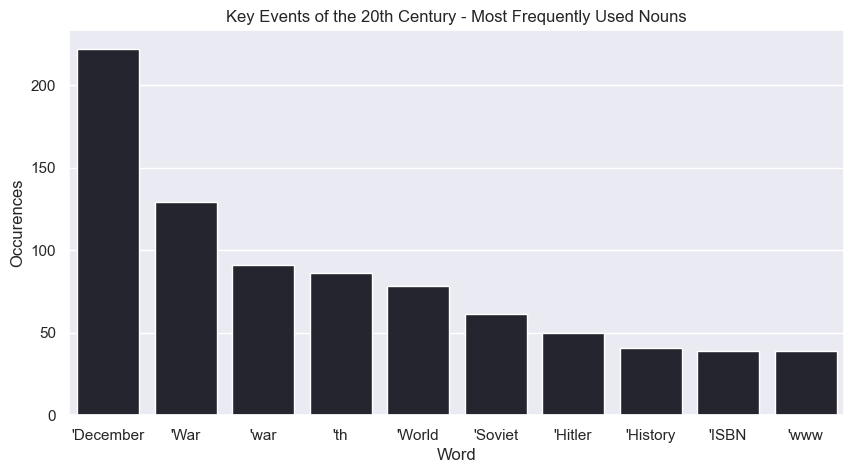

In [111]:
#plotting top 10 nouns 
plt.figure(figsize = (10, 5))
with sns.dark_palette("xkcd:blue", 20):
    sns.barplot(x = "Word", y = "Occurences",
    saturation = 0.9, data = top_10_nouns).set_title("Key Events of the 20th Century - Most Frequently Used Nouns")

### Top 10 Verbs

In [105]:
verbs_used = df_tags[(df_tags['Word type'] == "VB")  | (df_tags['Word type'] == "VBD")]
verbs_used.columns = ["Word", "Occurences"]
x = verbs_used.groupby('Word').count().reset_index()
y = x.sort_values(by = ['Occurences'], ascending=False)
top_10_verbs = y.nlargest(10, 'Occurences')

In [109]:
top_10_verbs

,Word,Occurences
27,'Retrieved,205
36,'United,30
0,'Allied,19
196,'led,15
316,'used,13
194,'launched,12
1,'Archived,10
93,'controlled,9
161,'forced,8
300,'surrendered,7


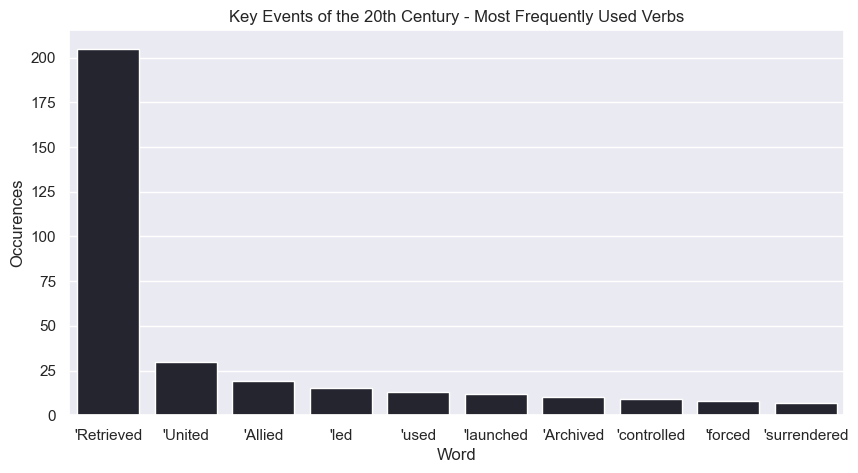

In [327]:
plt.figure(figsize = (10, 5))
with sns.dark_palette("xkcd:blue", 10):
    sns.barplot(x = "Word", y = "Occurences",
    saturation = 0.9, data = top_10_verbs).set_title("Key Events of the 20th Century - Most Frequently Used Verbs")

### Top 10 Adjectives

In [117]:
adjectives_used = df_tags[df_tags['Word type'] == "JJ"]
adjectives_used.columns = ["Word", "Occurences"]
x = adjectives_used.groupby('Word').count().reset_index()
y = x.sort_values(by=['Occurences'], ascending=False)
top_10_adjectives = y.nlargest(10, 'Occurences')

In [119]:
top_10_adjectives

,Word,Occurences
27,'Japanese,36
2,'American,24
5,'Atlantic,13
20,'Guardian,10
14,'Chinese,7
42,'Russian,6
103,'political,6
1,'African,6
104,'possible,5
7,'Baltic,5


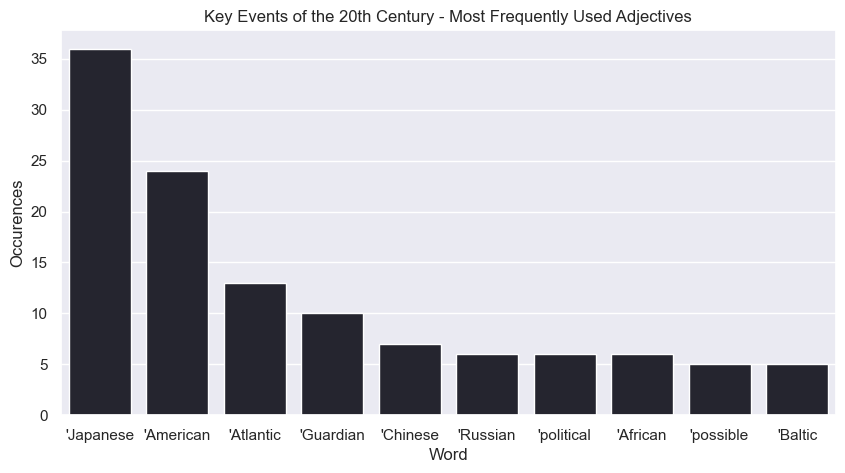

In [329]:
plt.figure(figsize = (10, 5))
with sns.dark_palette("xkcd:blue", 10):
    sns.barplot(x = "Word", y = "Occurences",
    saturation = 0.9, data = top_10_adjectives).set_title("Key Events of the 20th Century - Most Frequently Used Adjectives")

### Analysis

The list of the top 10 most commonly used words (after filtering) and the list of the top 10 nouns have many words in common.  Many of the top 10 verbs seem to be war-related, which reflects the fact that much of the 20th century was characterized by war.  Most of the adjectives pertain to countries or regions, which tells us where or with whom conflicts took place.  "Japanese" and "American" are used the most frequently suggesting that a lot of the article is about Japanese-American relations. 

### Determining the number of times countries are mentioned in the text

In [130]:
#converting filtered object into a string
listToStr = ' '.join([str(elem) for elem in filtered])

print(listToStr)

Key events th century WikipediaJump contentMain menuMain menumove sidebarhide Navigation Main pageContentsCurrent eventsRandom articleAbout WikipediaContact us Contribute HelpLearn editCommunity portalRecent changesUpload fileSearchSearchAppearanceDonateCreate accountLog inPersonal toolsDonate Create account Log Pages logged editors learn moreContributionsTalkContentsmove sidebarhide Top Historic events th centuryToggle Historic events th century subsection World beginning century war end wars World War I Russian Revolution communism Between wars Economic depression rise dictatorship Global war World War II war Europe Blitzkrieg Operation Barbarossa Turning tides Operation Overlord Final days war Pacific Background Japanese Expansion Allied offensive Final days Holocaust Nuclear Age begins post war world end empires decolonization Cold War War proxy space race end Cold War Information communications technology world end century See also References Sources External linksToggle table con

In [132]:
# storing results in a dictionary
all_counts = Counter(re.sub(r'\W+', ' ', listToStr).split()) 

In [158]:
all_counts

Counter({'December': 222,
         'Retrieved': 205,
         'War': 129,
         'war': 91,
         'th': 86,
         'World': 78,
         'Soviet': 61,
         'Hitler': 50,
         'Germany': 43,
         'History': 41,
         'www': 39,
         'ISBN': 39,
         'In': 38,
         'first': 38,
         'century': 37,
         'world': 37,
         'Japanese': 36,
         'would': 35,
         'German': 34,
         'edit': 33,
         'Japan': 33,
         'Germans': 32,
         'New': 31,
         'Union': 31,
         'II': 30,
         'United': 30,
         'September': 30,
         'S': 30,
         'ISSN': 30,
         'Europe': 29,
         'also': 29,
         'became': 27,
         'A': 27,
         'com': 27,
         'U': 26,
         'States': 26,
         'nuclear': 26,
         'August': 25,
         'June': 25,
         'Battle': 25,
         'July': 25,
         'end': 24,
         'American': 24,
         'October': 24,
         'history': 23,
      

In [256]:
#importing list of country names 
countries_list = pd.read_csv("countries_list_20th_century.csv", index_col = 0)

In [258]:
countries_list.head()

,country_name
1,Afghanistan
2,Albania
3,Algeria
4,Andorra
5,Angola


In [260]:
list_of_countries = countries_list['country_name'].to_list()

In [266]:
dict_of_counts = {d : all_counts[d] for d in list_of_countries}

In [269]:
dict_of_counts

{' Afghanistan ': 0,
 '  Albania ': 0,
 '  Algeria ': 0,
 '  Andorra ': 0,
 '  Angola ': 0,
 '  Antigua and Barbuda ': 0,
 '  Argentina ': 0,
 '  Armenia ': 0,
 '  Australia ': 0,
 '  Austria ': 0,
 '  Azerbaijan': 0,
 ' Bahamas, The ': 0,
 '  Bahrain ': 0,
 '  Bangladesh ': 0,
 '  Barbados ': 0,
 '  Belarus ': 0,
 '  Belgium ': 0,
 '  Belize ': 0,
 '  Benin ': 0,
 '  Bhutan ': 0,
 '  Bolivia ': 0,
 '  Bosnia and Herzegovina ': 0,
 '  Botswana ': 0,
 '  Brazil ': 0,
 '  Brunei ': 0,
 '  Bulgaria ': 0,
 '  Burkina Faso ': 0,
 '  Burundi': 0,
 ' Cambodia ': 0,
 '  Cameroon ': 0,
 '  Canada ': 0,
 '  Cape Verde ': 0,
 '  Central African Republic ': 0,
 '  Chad ': 0,
 '  Chile ': 0,
 "  China, People's Republic of ": 0,
 '  Colombia ': 0,
 '  Comoros ': 0,
 '  Congo, Democratic Republic of the ': 0,
 '  Congo, Republic of the ': 0,
 '  Costa Rica ': 0,
 '  Croatia ': 0,
 '  Cuba ': 0,
 '  Cyprus ': 0,
 '  Czech Republic': 0,
 '  Denmark ': 0,
 '   Djibouti ': 0,
 '   Dominica ': 0,
 '   Do

In [279]:
#making sure list_of_countries and all_counts formats match
print("list_of_countries:")
print(list_of_countries)  

list_of_countries:
[' Afghanistan ', '  Albania ', '  Algeria ', '  Andorra ', '  Angola ', '  Antigua and Barbuda ', '  Argentina ', '  Armenia ', '  Australia ', '  Austria ', '  Azerbaijan', ' Bahamas, The ', '  Bahrain ', '  Bangladesh ', '  Barbados ', '  Belarus ', '  Belgium ', '  Belize ', '  Benin ', '  Bhutan ', '  Bolivia ', '  Bosnia and Herzegovina ', '  Botswana ', '  Brazil ', '  Brunei ', '  Bulgaria ', '  Burkina Faso ', '  Burundi', ' Cambodia ', '  Cameroon ', '  Canada ', '  Cape Verde ', '  Central African Republic ', '  Chad ', '  Chile ', "  China, People's Republic of ", '  Colombia ', '  Comoros ', '  Congo, Democratic Republic of the ', '  Congo, Republic of the ', '  Costa Rica ', '  Croatia ', '  Cuba ', '  Cyprus ', '  Czech Republic', '  Denmark ', '   Djibouti ', '   Dominica ', '   Dominican Republic', '  East Timor ', '   Ecuador ', '   Egypt ', '   El Salvador ', '   Equatorial Guinea ', '   Eritrea ', '   Estonia ', '   Eswatini ', '   Ethiopia', '  F

In [281]:
print("all_counts keys:")
print(all_counts.keys()) 

all_counts keys:
dict_keys(['Key', 'events', 'th', 'century', 'WikipediaJump', 'contentMain', 'menuMain', 'menumove', 'sidebarhide', 'Navigation', 'Main', 'pageContentsCurrent', 'eventsRandom', 'articleAbout', 'WikipediaContact', 'us', 'Contribute', 'HelpLearn', 'editCommunity', 'portalRecent', 'changesUpload', 'fileSearchSearchAppearanceDonateCreate', 'accountLog', 'inPersonal', 'toolsDonate', 'Create', 'account', 'Log', 'Pages', 'logged', 'editors', 'learn', 'moreContributionsTalkContentsmove', 'Top', 'Historic', 'centuryToggle', 'subsection', 'World', 'beginning', 'war', 'end', 'wars', 'War', 'I', 'Russian', 'Revolution', 'communism', 'Between', 'Economic', 'depression', 'rise', 'dictatorship', 'Global', 'II', 'Europe', 'Blitzkrieg', 'Operation', 'Barbarossa', 'Turning', 'tides', 'Overlord', 'Final', 'days', 'Pacific', 'Background', 'Japanese', 'Expansion', 'Allied', 'offensive', 'Holocaust', 'Nuclear', 'Age', 'begins', 'post', 'world', 'empires', 'decolonization', 'Cold', 'proxy', 

In [285]:
#in list_of_countries, there are spaces before and after the country_name
#taking away the spaces to make it match the format of all_counts 
normalized_all_counts = {key.strip(): value for key, value in all_counts.items()}
normalized_countries_list = [country_name.strip() for country_name in list_of_countries]

In [287]:
print("Normalized all_counts:", normalized_all_counts)

Normalized all_counts: {'Key': 2, 'events': 9, 'th': 86, 'century': 37, 'WikipediaJump': 1, 'contentMain': 1, 'menuMain': 1, 'menumove': 1, 'sidebarhide': 3, 'Navigation': 1, 'Main': 18, 'pageContentsCurrent': 1, 'eventsRandom': 1, 'articleAbout': 1, 'WikipediaContact': 1, 'us': 2, 'Contribute': 1, 'HelpLearn': 1, 'editCommunity': 1, 'portalRecent': 1, 'changesUpload': 2, 'fileSearchSearchAppearanceDonateCreate': 1, 'accountLog': 1, 'inPersonal': 1, 'toolsDonate': 1, 'Create': 1, 'account': 1, 'Log': 1, 'Pages': 1, 'logged': 1, 'editors': 1, 'learn': 1, 'moreContributionsTalkContentsmove': 1, 'Top': 1, 'Historic': 4, 'centuryToggle': 1, 'subsection': 1, 'World': 78, 'beginning': 8, 'war': 91, 'end': 24, 'wars': 11, 'War': 129, 'I': 9, 'Russian': 6, 'Revolution': 6, 'communism': 8, 'Between': 6, 'Economic': 4, 'depression': 2, 'rise': 7, 'dictatorship': 4, 'Global': 3, 'II': 30, 'Europe': 29, 'Blitzkrieg': 3, 'Operation': 15, 'Barbarossa': 4, 'Turning': 2, 'tides': 3, 'Overlord': 4, 'Fi

In [289]:
#checking to see the spaces have been removed
print("Normalized countries_list:", normalized_countries_list)

Normalized countries_list: ['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas, The', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde', 'Central African Republic', 'Chad', 'Chile', "China, People's Republic of", 'Colombia', 'Comoros', 'Congo, Democratic Republic of the', 'Congo, Republic of the', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'East Timor', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia, The', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea', 'Bissau', 'Guyana', 'Haiti', 'Hondu

In [291]:
dict_of_counts = {country_name: normalized_all_counts.get(country_name, 0) for country_name in normalized_countries_list}

In [293]:
#checking to see whether it worked 
dict_of_counts

{'Afghanistan': 1,
 'Albania': 2,
 'Algeria': 1,
 'Andorra': 0,
 'Angola': 1,
 'Antigua and Barbuda': 0,
 'Argentina': 0,
 'Armenia': 0,
 'Australia': 2,
 'Austria': 5,
 'Azerbaijan': 0,
 'Bahamas, The': 0,
 'Bahrain': 0,
 'Bangladesh': 2,
 'Barbados': 0,
 'Belarus': 1,
 'Belgium': 2,
 'Belize': 0,
 'Benin': 0,
 'Bhutan': 0,
 'Bolivia': 0,
 'Bosnia and Herzegovina': 0,
 'Botswana': 0,
 'Brazil': 0,
 'Brunei': 0,
 'Bulgaria': 2,
 'Burkina Faso': 0,
 'Burundi': 0,
 'Cambodia': 2,
 'Cameroon': 0,
 'Canada': 2,
 'Cape Verde': 0,
 'Central African Republic': 0,
 'Chad': 0,
 'Chile': 0,
 "China, People's Republic of": 0,
 'Colombia': 0,
 'Comoros': 0,
 'Congo, Democratic Republic of the': 0,
 'Congo, Republic of the': 0,
 'Costa Rica': 0,
 'Croatia': 0,
 'Cuba': 3,
 'Cyprus': 0,
 'Czech Republic': 0,
 'Denmark': 3,
 'Djibouti': 0,
 'Dominica': 0,
 'Dominican Republic': 0,
 'East Timor': 0,
 'Ecuador': 0,
 'Egypt': 2,
 'El Salvador': 0,
 'Equatorial Guinea': 0,
 'Eritrea': 0,
 'Estonia': 2,
 

In [295]:
dct = {v:[k] for v,k in dict_of_counts.items()}  
country_mentions = pd.DataFrame(dct)

In [297]:
country_mentions

,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,Donetsk People's Republic,Kosovo,Luhansk People's Republic,Niue,Northern Cyprus,Sahrawi Arab Democratic Republic,Somaliland,South Ossetia,Taiwan,Transnistria
0,1,2,1,0,1,0,0,0,2,5,...,0,0,0,0,0,0,0,0,0,0


In [299]:
country_mentions = country_mentions.transpose().reset_index()

In [301]:
country_mentions

,index,0
0,Afghanistan,1
1,Albania,2
2,Algeria,1
3,Andorra,0
4,Angola,1
...,...,...
203,Sahrawi Arab Democratic Republic,0
204,Somaliland,0
205,South Ossetia,0
206,Taiwan,0


In [303]:
country_mentions.rename(columns = {"index":"Country Name", 0:"Times mentioned"}, inplace = True)

In [305]:
country_mentions

,Country Name,Times mentioned
0,Afghanistan,1
1,Albania,2
2,Algeria,1
3,Andorra,0
4,Angola,1
...,...,...
203,Sahrawi Arab Democratic Republic,0
204,Somaliland,0
205,South Ossetia,0
206,Taiwan,0


In [311]:
import os

In [313]:
#creating path
path = r'C:\Users\canam\OneDrive\Desktop\Career Foundry'

In [317]:
# saving the dataframe as csv
country_mentions.to_csv(os.path.join(path, 'Specialization', '20th-Century', 'country_mentions.csv'))

In [340]:
#sorting the number of country mentions 
sorted_country_mentions = country_mentions.sort_values(by='Times mentioned', ascending=False)

In [344]:
sorted_country_mentions.head(20)

,Country Name,Times mentioned
64,Germany,43
85,Japan,33
60,France,16
82,Italy,14
191,Vietnam,13
140,Poland,13
144,Russia,10
76,India,9
130,Norway,5
9,Austria,5


In [350]:
#identifying the top 10 mentioned countries 
top_20_mentioned_countries = sorted_country_mentions.head(20)

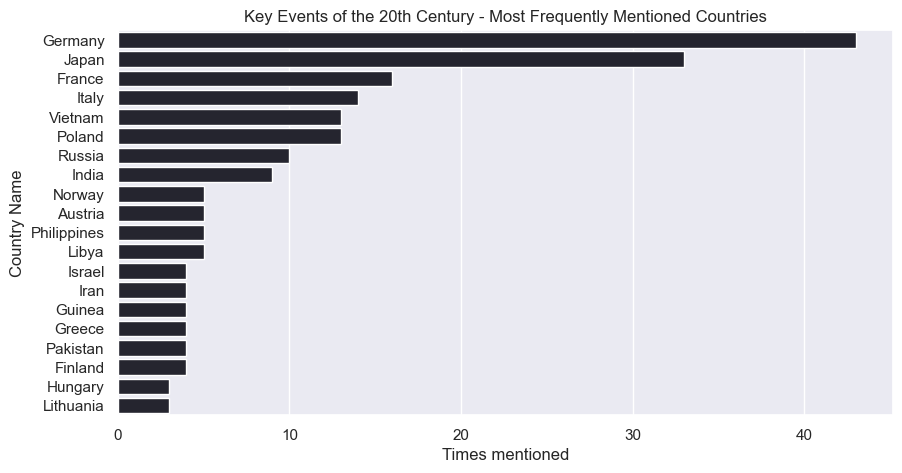

In [352]:
#plotting top_20_mentioned_countries 
plt.figure(figsize = (10, 5))
with sns.dark_palette("xkcd:blue", 10):
    sns.barplot(x = "Times mentioned", y = "Country Name",
    saturation = 0.9, data = top_20_mentioned_countries).set_title("Key Events of the 20th Century - Most Frequently Mentioned Countries")

### Analysis

I notice that Germany and Japan are mentioned much more than other countries.  This makes sense given their heavy involvement in World War II and the significance of the war in the 20th century.  I also notice that more than half of the most commonly mentioned countries are European countries. This makes sense considering that Europe was the primary battleground for both World Wars I and II, was the site of the Holocaust and several totalitarian regimes, and was divided by the Cold War.  I am a litte suprised that America did not make the top 20 countries most mentioned but recall that the word "American" is the second most used adjective in the article.            

### Bonus Task: Sentiment Analysis

#### Prediction

In terms of polarity, I predict that the text will have a sentiment close to -1 (a negative sentiment) considering that war is one of the most mentioned words.  I predict that the text will have a subjectivity of close to zero, because it is comprised of facts instead of personal opinion. 

In [364]:
text_sent = TextBlob(str(filtered))

In [366]:
print(text_sent.sentiment)

Sentiment(polarity=0.04908965044576243, subjectivity=0.3547056487654955)


Unlike what I predicted, the polarity is close to 0, meaning that the overall sentiment is neither positive nor negative.  This makes sense because while much of the 20th century *was* characterized by war, it must also be taken into account the numerous technological, political, and economic advances that took place.  As predicted, subjectivity is close to 0, meaning that this text is more of a factual collection than a personal narrative.     